In [13]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures

In [14]:
Ml=pd.read_csv("C:\\Users\\koné aicha koty\\Desktop\\kc_house_data.csv")
Ml

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [15]:
Ml.drop('date',axis=1,inplace=True)

In [17]:
Ml.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
d=sns.distplot(Ml["bedrooms"],bins=10,hist=True,kde=True ,color="red")


In [ ]:
d=sns.distplot(Ml["bathrooms"],bins=10,hist=True,kde=True ,color="blue")


In [ ]:
#model=LinearRegression() 
#model.fit(x_train,y_train)
#predicted=model.predict(x_test) 

In [ ]:
import matplotlib.pyplot as plt
def plot_correlation_map( df ):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 25, 16 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap(
        corr,
        cmap = cmap,
        square=True,
        cbar_kws={ 'shrink' : .9 },
        ax=ax,
        annot = True,
        annot_kws = { 'fontsize' : 12 }
        )
plot_correlation_map(Ml)

In [ ]:
import matplotlib.pyplot as plt
def plot_correlation_map( df ):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 25, 16 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap(
        corr,
        cmap = cmap,
        square=True,
        cbar_kws={ 'shrink' : .9 },
        ax=ax,
        annot = True,
        annot_kws = { 'fontsize' : 12 }
        )
plot_correlation_map(Ml[["sqft_living","sqft_above","sqft_living15","grade"]])

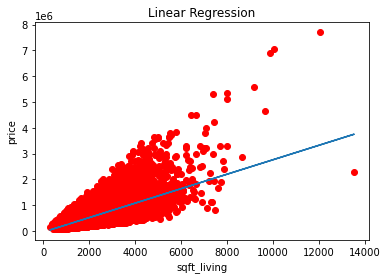

In [46]:
x2=Ml['sqft_living'].values[:,np.newaxis]
y2=Ml['price'].values
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.4, random_state=100)
model2 = LinearRegression()
model2.fit(x2_train, y2_train)
predicted2 = model2.predict(x2_test)
plt.scatter(x2,y2,color='r')
plt.title("Linear Regression")
plt.ylabel('price')
plt.xlabel('sqft_living')
plt.plot(x2,model2.predict(x2))
plt.show()

In [60]:
Ml

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [65]:
x3=Ml.drop(["price"],axis=1)
y=Ml["price"].values
y = y.reshape(21613,1)

In [66]:
x3_train,x3_test,y_train,y_test=train_test_split(x3,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

In [67]:
model=LinearRegression() 
model.fit(x3_train,y_train)
predicted=model.predict(x3_test) 

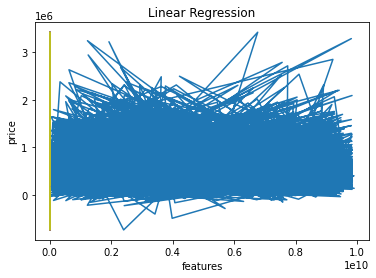

In [68]:
#plt.scatter(x3,y,color='red')
plt.title("Linear Regression")
plt.ylabel('price')
plt.xlabel('features')
plt.plot(x3,model.predict(x3))


In [25]:
print("MSE: ", metrics.mean_squared_error(y_test, predicted)) #print ("accuracy",model.score(x_test,y_test))

MSE:  37469666737.34823


In [41]:
x1=Ml.drop(["price"],axis=1)
y1= Ml["price"].values
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.35, random_state=40)  #splitting data
lg=LinearRegression()
poly=PolynomialFeatures(degree=3)
x1_train_fit = poly.fit_transform(x1_train) #transforming our input data
lg.fit(x1_train_fit, y1_train)
x1_test_ = poly.fit_transform(x1_test)
predicted1 = lg.predict(x1_test_)

In [42]:
print("MSE: ", metrics.mean_squared_error(y1_test, predicted1))


MSE:  63254894406.33453


In [43]:
print("R squared: ", metrics.r2_score(y1_test,predicted1))


R squared:  0.4968490545097054
